![EncabezadoIN](EncabezadoIN.JPG)

## Laboratorio 2 - Regresión

Integrantes: 
Santiago Rodriguez Bernal - 202011182

Luis Angel Angarita -

Juan Camilo Pacheco -


## Caso 

La Organización Mundial de la Salud (OMS), en colaboración con el gobierno de Estados Unidos, está implementando un novedoso programa de financiamiento para abordar las preocupantes tasas de mortalidad por cáncer en distintas poblaciones. Con el propósito de intervenir de manera efectiva en el mediano y largo plazo en comunidades vulnerables, se ha reconocido la necesidad de desarrollar un modelo predictivo que identifique áreas con altas tasas de mortalidad por cáncer, incluso en ausencia de registros exhaustivos. La recopilación de datos demográficos y de salud provenientes de diversas regiones de Estados Unidos sirve como base para la creación de este modelo, que busca guiar la asignación de fondos del programa, priorizando intervenciones en diagnóstico temprano, tratamiento y formación del personal médico.

Este modelo se distingue por su capacidad para analizar características demográficas y el estado de los servicios de salud en poblaciones específicas, permitiendo así la identificación de factores asociados a tasas más elevadas de mortalidad por cáncer. La información resultante contribuye a una toma de decisiones más informada y a la asignación precisa de recursos, optimizando la efectividad del programa de financiamiento y representando un paso significativo en la lucha global contra el cáncer.

### Division trabajo

No se realizo una reparticion como la indicada en rubrica, ya que el trabajo se realizo en conjunto con todos los integrantes. Por lo que consideramos que todos deben ser incluidos en todos los apartados del laboratorio propuesto.

## 1. Carga de librerías necesarias para implementación

In [677]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin


from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

import scipy.stats as stats

## 2. Cargar los datos

In [678]:
# Se cargan los datos de entrenamiento.
df_oms=pd.read_csv('./202410_Laboratorio 2 - Regresión_train_data.csv', sep=',', encoding = "ISO-8859-1")


## 3. Entendimiento de los datos

In [679]:
df_oms.shape

(2132, 34)

In [680]:
df_oms.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack            

In [681]:
df_oms.sample(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
536,271.0,117,533.4,44289,38339,18.6,991.157829,"(42724.4, 45201]",41.7,40.3,...,37.9,46.0,26.1,92.996250,3.680331,0.760378,0.439674,47.342077,6.338626,219.1
1938,40.0,12,283.5,48940,16067,14.9,248.957491,"(48021.6, 51046.4]",34.3,34.1,...,35.3,22.2,13.4,95.661619,0.715609,0.626158,0.421698,42.229998,6.455696,102.6
181,34.0,21,372.9,45997,5306,12.2,0.000000,"(45201, 48021.6]",47.1,45.3,...,39.8,34.3,13.7,97.886029,0.294118,0.863971,0.018382,49.060376,7.641509,222.4
1376,92.0,37,425.0,42056,16901,17.5,0.000000,"(40362.7, 42724.4]",41.8,42.5,...,41.2,36.5,20.4,96.182849,2.086865,0.081838,0.134448,54.778982,5.194197,171.8
769,122.0,47,533.0,41688,16852,15.9,0.000000,"(40362.7, 42724.4]",44.7,40.9,...,34.9,38.1,18.7,94.303987,0.000000,0.759070,1.440440,53.747425,4.495991,190.0


In [682]:
#Analisis estadistico de las variables numericas

df_oms.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
count,2132.000000,2132.000000,2132.000000,2132.000000,2.132000e+03,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,613.385785,183.537992,448.816467,47029.474203,1.025064e+05,16.889681,158.003002,44.298687,39.559475,42.140009,...,41.237899,36.305113,19.282786,83.686321,9.132512,1.260485,1.953356,51.228950,5.643918,179.000047
std,1435.393846,507.649052,53.582307,12107.930677,3.442282e+05,6.415614,533.636824,39.522898,5.208212,5.272267,...,9.326155,7.847326,6.136426,16.588379,14.613785,2.745672,3.484569,6.565620,1.980214,27.416156
min,6.000000,3.000000,201.300000,22640.000000,8.290000e+02,3.200000,0.000000,23.500000,22.800000,22.800000,...,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.700000
25%,77.000000,28.000000,421.600000,38875.750000,1.154725e+04,12.200000,0.000000,37.700000,36.300000,39.000000,...,34.600000,30.975000,14.900000,77.560360,0.614838,0.263542,0.278374,47.749949,4.520411,161.875000
50%,174.500000,62.000000,453.549422,45207.000000,2.693200e+04,15.900000,0.000000,40.900000,39.600000,42.300000,...,41.300000,36.400000,18.900000,90.122747,2.214754,0.538013,0.781727,51.595091,5.383877,178.550000
75%,515.250000,141.000000,481.600000,52376.250000,6.663525e+04,20.300000,79.275307,44.000000,42.600000,45.400000,...,47.600000,41.425000,23.200000,95.600016,10.709158,1.190457,2.171349,55.398869,6.478029,195.300000
max,38150.000000,14010.000000,1014.200000,125635.000000,1.017029e+07,47.400000,9439.200444,619.200000,64.700000,65.700000,...,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,37.859023,78.075397,21.326165,293.900000


## 3.1 Resultados del entendimiento de los datos


Al profundizar en nuestra exploración, hemos confirmado la existencia de 2132 registros, cada uno dotado de 34 columnas, lo que implica que poseemos información detallada sobre 2132 poblaciones distribuidas en todo el territorio de Estados Unidos. Estas columnas son inherentemente ricas en contenido, abarcando una diversidad de 33 variables numéricas y una variable categórica que identifica el nombre del condado. La relevancia de esta información para nuestro estudio es significativa, ya que incluye aspectos clave como el promedio de muertes por cáncer, el número anual promedio de casos diagnosticados, así como otras variables cruciales que comprenden datos socioeconómicos, la ubicación del condado y los ingresos de las poblaciones analizadas.

La estructura del diccionario de datos proporciona una guía esencial para comprender la naturaleza de estas variables, ofreciendo una visión detallada de los rangos y límites específicos asociados a cada una. Este enfoque metodológico garantiza la coherencia y fiabilidad de la información recopilada, ya que se establecen parámetros claros. Por ejemplo, se han definido límites en porcentajes y edades para evitar valores negativos y garantizar que las cifras se mantengan dentro de intervalos lógicos. La meticulosa atención a la integridad de los datos refuerza la solidez de nuestro análisis, facilitando así la extracción de conocimientos valiosos de esta extensa base de datos sobre la salud y demografía en Estados Unidos.

## 4. Analisis de calidad de los datos

### 4.1 Seleccion de Variables

In [683]:
# Primero seleccionamos las variables que usaremos en el estudio, pues son las que consideramos nos dan mas informacion sobre el problema de cara a los objetivos
columnas = ["deathRate", "incidenceRate", "studyPerCap", "MedianAge", "popEst2015", "povertyPercent", "PctPrivateCoverage", "PctPublicCoverage", "PctWhite", "PctBlack", "PctAsian", "PctOtherRace"]

Se han seleccionado las variables mencionadas con el propósito de calcular la tasa de mortalidad y diagnóstico ajustada al tamaño de la población, con el fin de facilitar la comparación entre distintas poblaciones. Además de estas métricas esenciales, se han incorporado otras variables relevantes para enriquecer nuestro análisis sobre las causas de la mortalidad en una población específica.

Entre las variables adicionales incluidas se encuentran el número de ensayos realizados, la edad de la población, el porcentaje de pobreza, y la distinción entre sistemas de salud públicos o privados. Estas variables ofrecen una perspectiva más completa al evaluar posibles factores contribuyentes a las tasas de mortalidad por cáncer. La información sobre el nombre del condado y su población asociada proporciona un contexto crucial, permitiendo identificar a qué población pertenecen los datos analizados.

Finalmente, se ha incorporado el tipo de raza como una variable para explorar posibles disparidades en el impacto del cáncer entre diferentes grupos étnicos. Esta inclusión busca arrojar luz sobre la posibilidad de que ciertos grupos raciales puedan estar más afectados por el cáncer que otros, lo que podría guiar investigaciones adicionales para comprender las razones detrás de estas disparidades en la salud. En conjunto, estas variables proporcionarán una visión más completa y detallada para informar sobre las complejas interacciones entre la salud, la demografía y las tasas de mortalidad por cáncer en las diversas poblaciones analizadas.

### 4.2 Completitud

In [684]:
#Analizamos la completitud de los datos
df_oms[["Geography"]+columnas].isnull().sum() / df_oms.shape[0]

Geography             0.0
deathRate             0.0
incidenceRate         0.0
studyPerCap           0.0
MedianAge             0.0
popEst2015            0.0
povertyPercent        0.0
PctPrivateCoverage    0.0
PctPublicCoverage     0.0
PctWhite              0.0
PctBlack              0.0
PctAsian              0.0
PctOtherRace          0.0
dtype: float64

Para el análisis de completitud se evidencio que porcentaje de valores nulos que tiene cada una de las columnas de los datos es de 0. Por lo que podemos afirmar que no existen registros incompletos en nuestras variables elegidas

### 4.3 Unicidad

In [685]:
#Se revisa si hay registros duplicados
df_oms.duplicated(keep = False).sum()

0

Para el análisis de unicidad primero se buscó si había registros repetidos y se encontró que existen 0 registros que están duplicados, por lo que la base de datos fue bien revisada.

### 4.3 Consistencia

In [686]:
# Se revisa la variable TypeName
df_oms.Geography.value_counts()

Gregory County, South Dakota    1
Cass County, Iowa               1
Brown County, Illinois          1
Mitchell County, Iowa           1
Newton County, Missouri         1
                               ..
Jackson County, Wisconsin       1
Wetzel County, West Virginia    1
Grand Isle County, Vermont      1
Bayfield County, Wisconsin      1
Denver County, Colorado         1
Name: Geography, Length: 2132, dtype: int64

Se revisa la unica variable categorica del estudio para evaluar si existen errores de digitacion, pero como podemos evidenciar los condados fueron nombrados correctamente por lo que no hay inconsistencias en los nombres pues solo existe 1 nombre para cada condado y suman los 2132 registros que estamos estudiando

### 4.5 Validez

Se revisó la validez de cada columna y no se encontraron valores fuera de lo normal para ninguna. Esto puede ser evidenciado en que en la carga de los datos todas las columnas son del datatype esperado. Adicionalmente, se cargaron los datos en la herramienta Power BI y no se encontró errores en ninguna columna.

## 5. Perfilamiento de datos

A continuación se presenta un perfilamiento completo de los datos con el perfilador Y Profiling para un entendimiento mayor de los datos

## 6. Preparación de los datos 

### 6.1 Corrección de los datos

Teniendo en cuenta que los datos como vimos anteriormente presentan una calidad bastante alta pues carecen de incosistencias, registros vacios o duplicados se procedio a verificar que se encontraran en rangos correctos y logicos. Es decir que no hubieran valores negativos o que se excedan porcentajes



In [687]:
(df_oms[columnas] < 0).any()


deathRate             False
incidenceRate         False
studyPerCap           False
MedianAge             False
popEst2015            False
povertyPercent        False
PctPrivateCoverage    False
PctPublicCoverage     False
PctWhite              False
PctBlack              False
PctAsian              False
PctOtherRace          False
dtype: bool

In [688]:
columns_to_check = ["PctPrivateCoverage", "PctPublicCoverage", "PctWhite", "PctBlack", "PctAsian", "PctOtherRace"]

out_of_range_values = df_oms[columns_to_check].apply(lambda x: (x < 0) | (x > 100)).sum()
out_of_range_values


PctPrivateCoverage    0
PctPublicCoverage     0
PctWhite              0
PctBlack              0
PctAsian              0
PctOtherRace          0
dtype: int64

Pero como vemos en el analisis anterior todos los valores se encuentran en el rango correcto y siguen la logica esperada, excepto median age que llega a valores no normales

In [689]:
df_oms_prep = df_oms[df_oms['MedianAge'] <= 100]


Como sabemos el modelo de regresión es sensible a valores atípicos por lo que revisamos los valores atípicos en la variables de interés y en los candidatos a elegir para la regresión y los eliminamos.

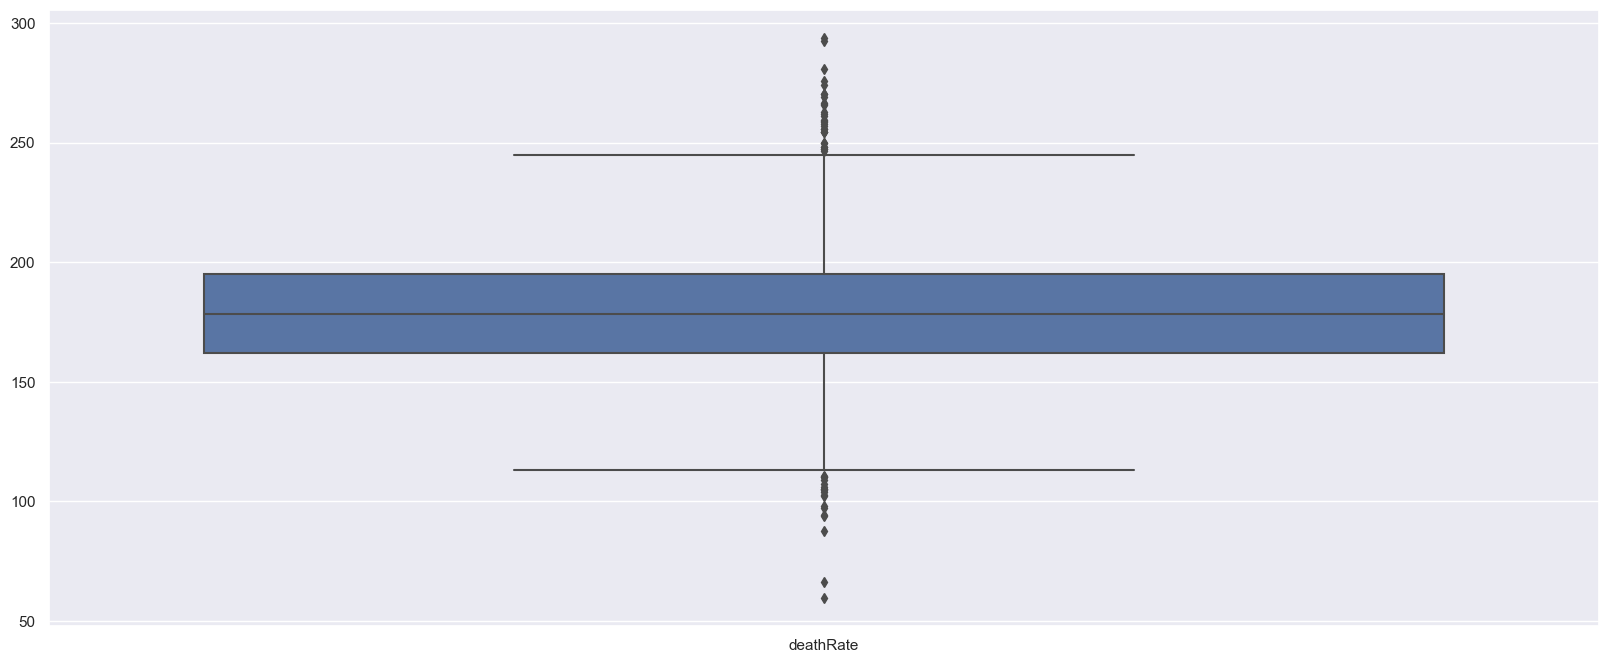

In [690]:
# Analizar valores atipicos en la variable de interes

df_oms_prep_var1 = df_oms_prep[['deathRate']].copy()
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_oms_prep_var1, orient ="v")

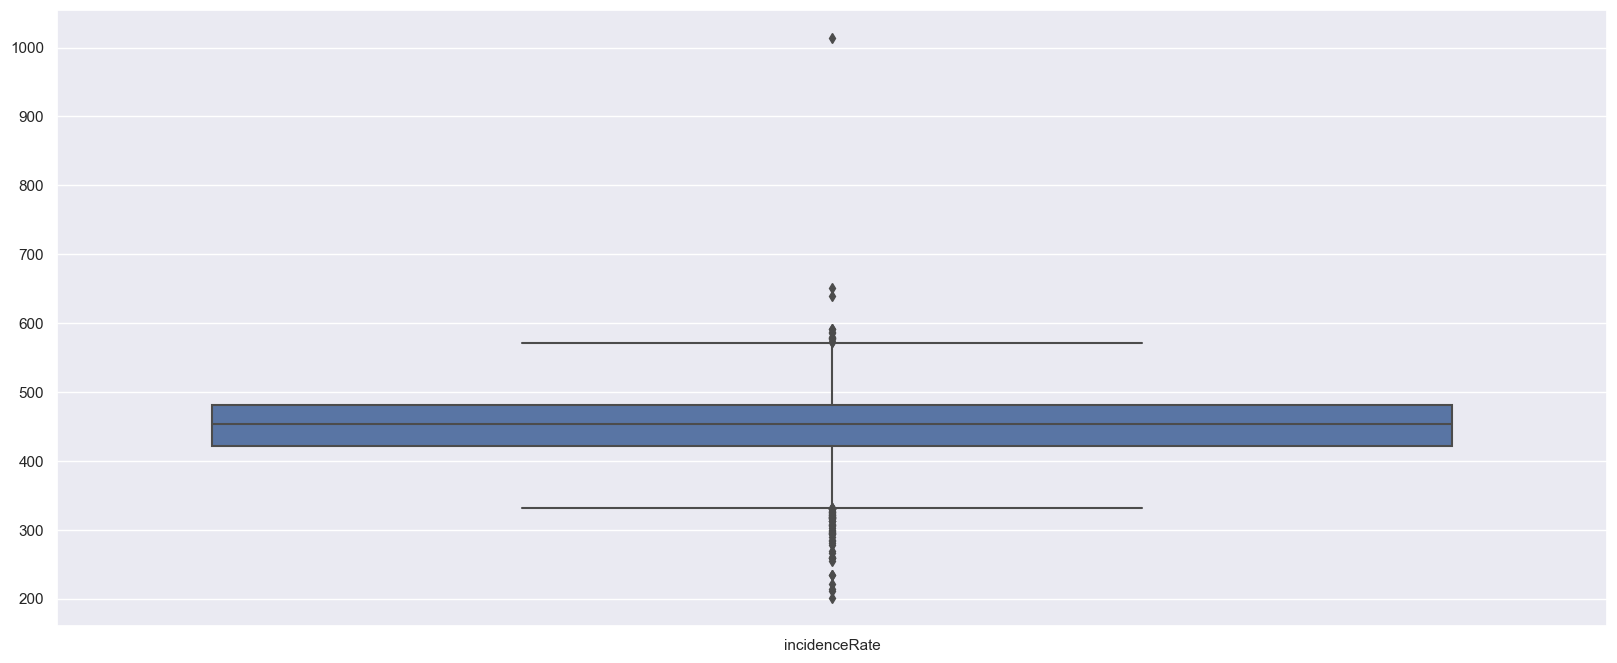

In [691]:
df_oms_prep_var2 = df_oms_prep[['incidenceRate']].copy()
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_oms_prep_var2, orient ="v")

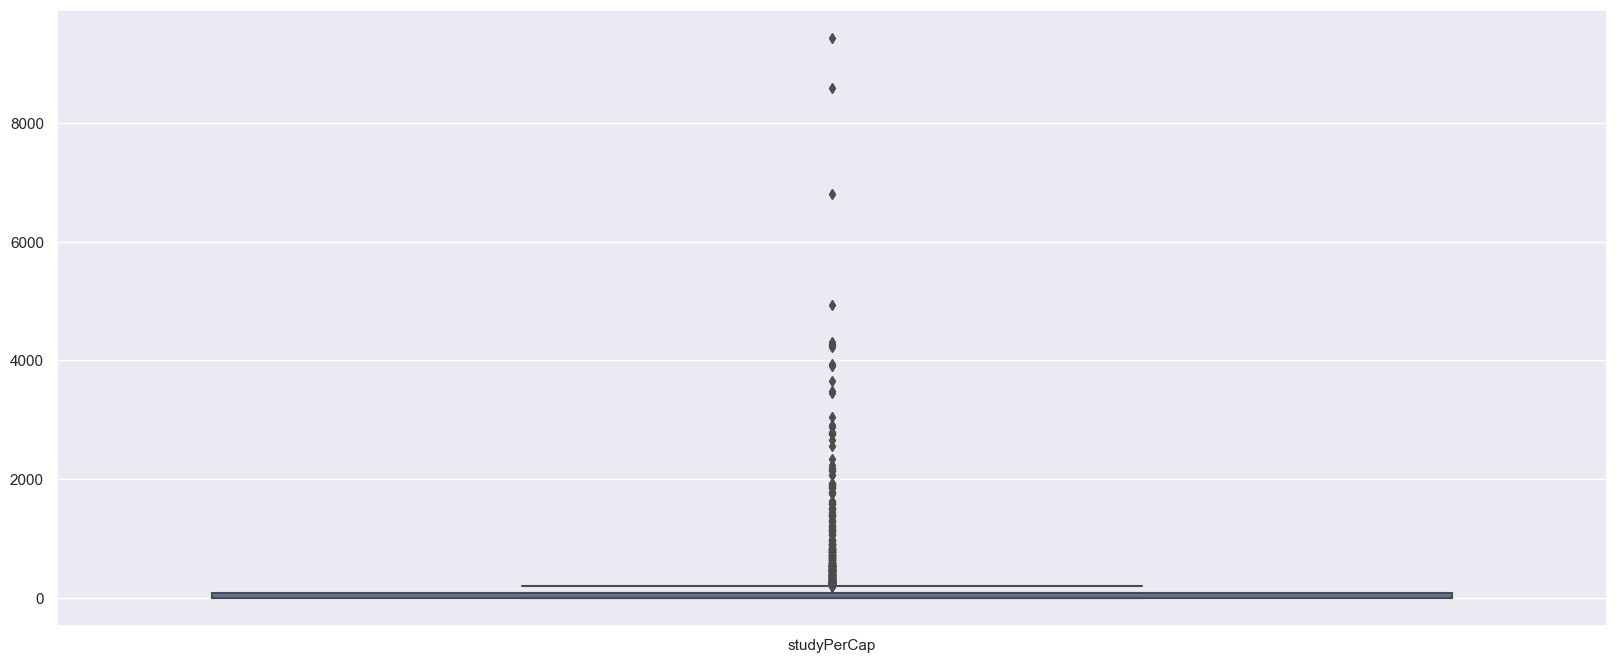

In [692]:
df_oms_prep_var3 = df_oms_prep[['studyPerCap']].copy()
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_oms_prep_var3, orient ="v")

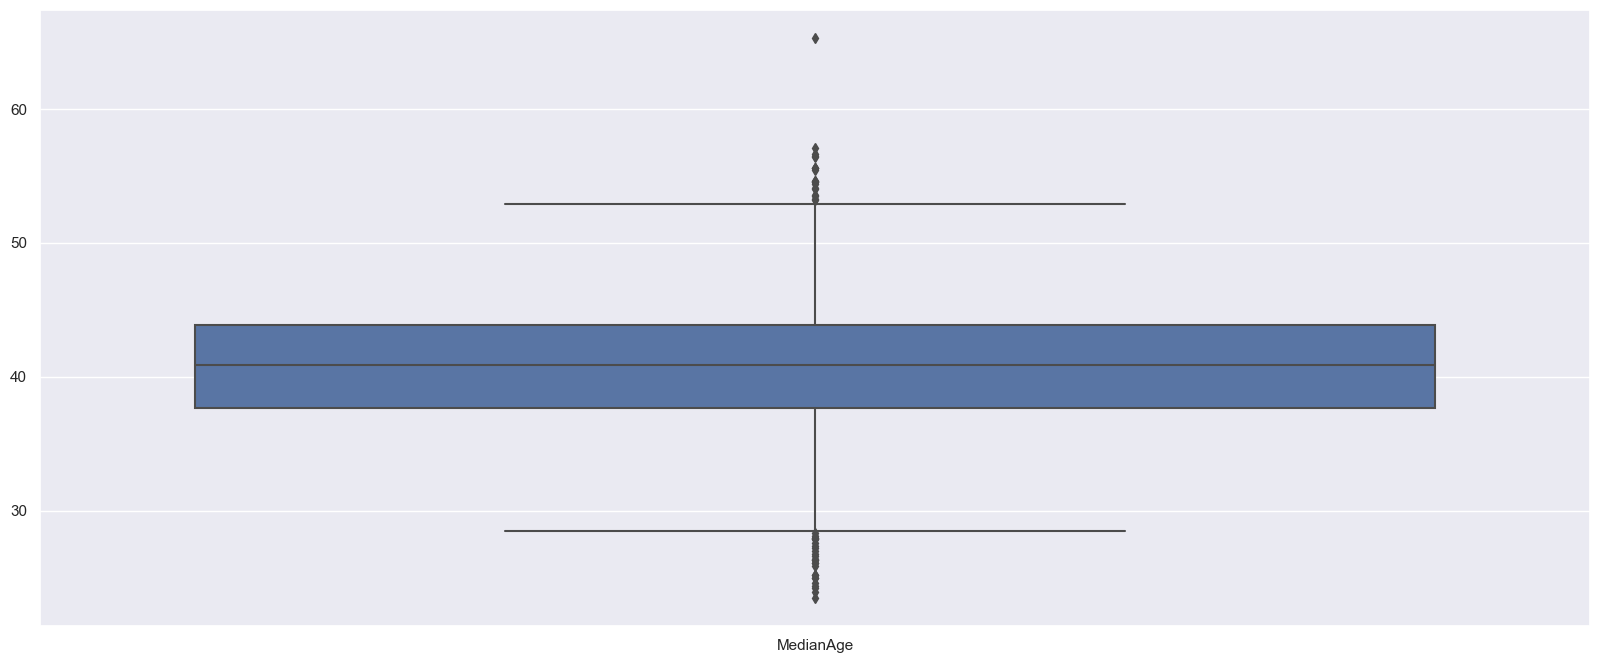

In [693]:
df_oms_prep_var4 = df_oms_prep[['MedianAge']].copy()
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_oms_prep_var4, orient ="v")

In [694]:
# Calculate Q1, Q3, and IQR for 'deathRate'
Q1 = df_oms['deathRate'].quantile(0.25)
Q3 = df_oms['deathRate'].quantile(0.75)
IQR = Q3 - Q1

# Define the range within which values are not considered outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_oms_prep = df_oms[(df_oms['deathRate'] >= lower_bound) & (df_oms['deathRate'] <= upper_bound)]


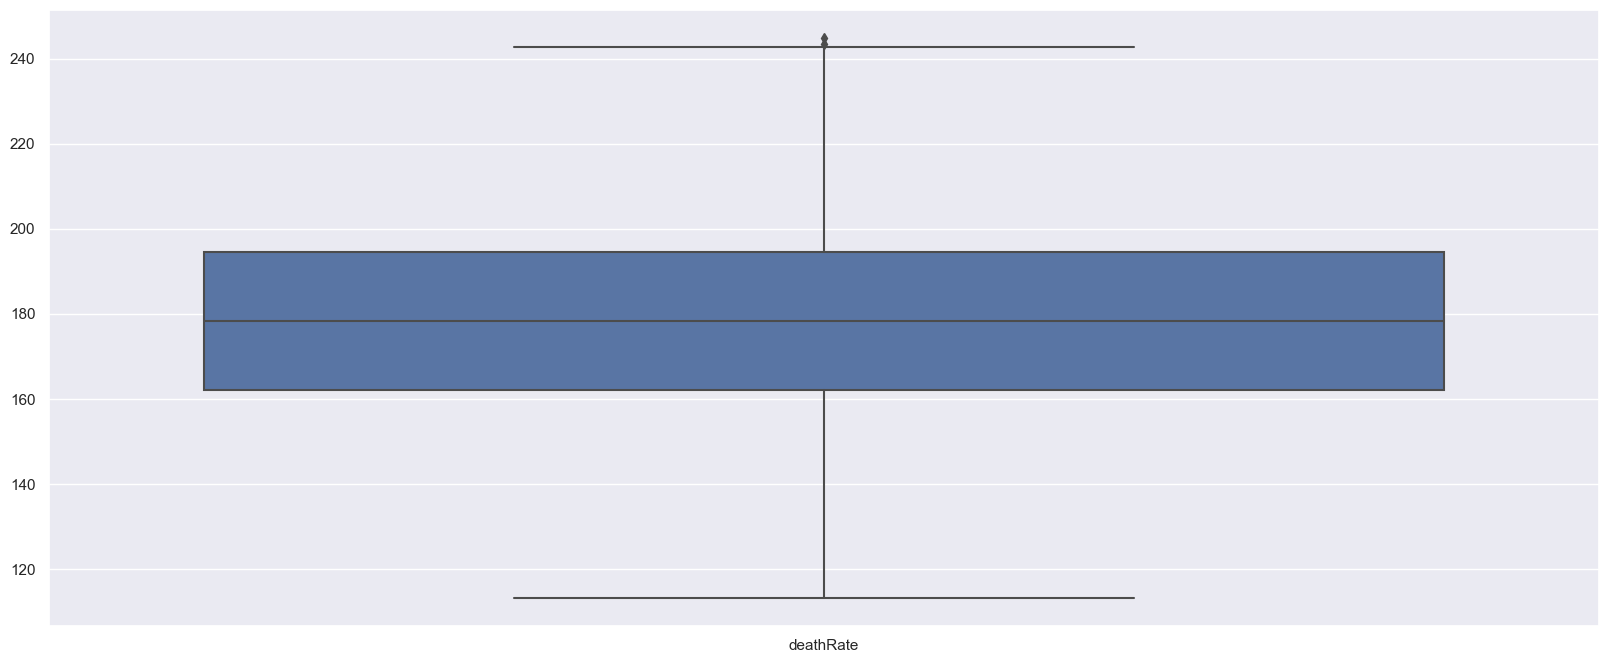

In [695]:
df_oms_prep_var1 = df_oms_prep[['deathRate']].copy()
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_oms_prep_var1, orient ="v")

In [696]:
# Calculate Q1, Q3, and IQR for 'incidenceRate'
Q1 = df_oms['incidenceRate'].quantile(0.25)
Q3 = df_oms['incidenceRate'].quantile(0.75)
IQR = Q3 - Q1

# Define the range within which data points are not considered outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_oms_prep = df_oms[(df_oms['incidenceRate'] >= lower_bound) & (df_oms['incidenceRate'] <= upper_bound)]


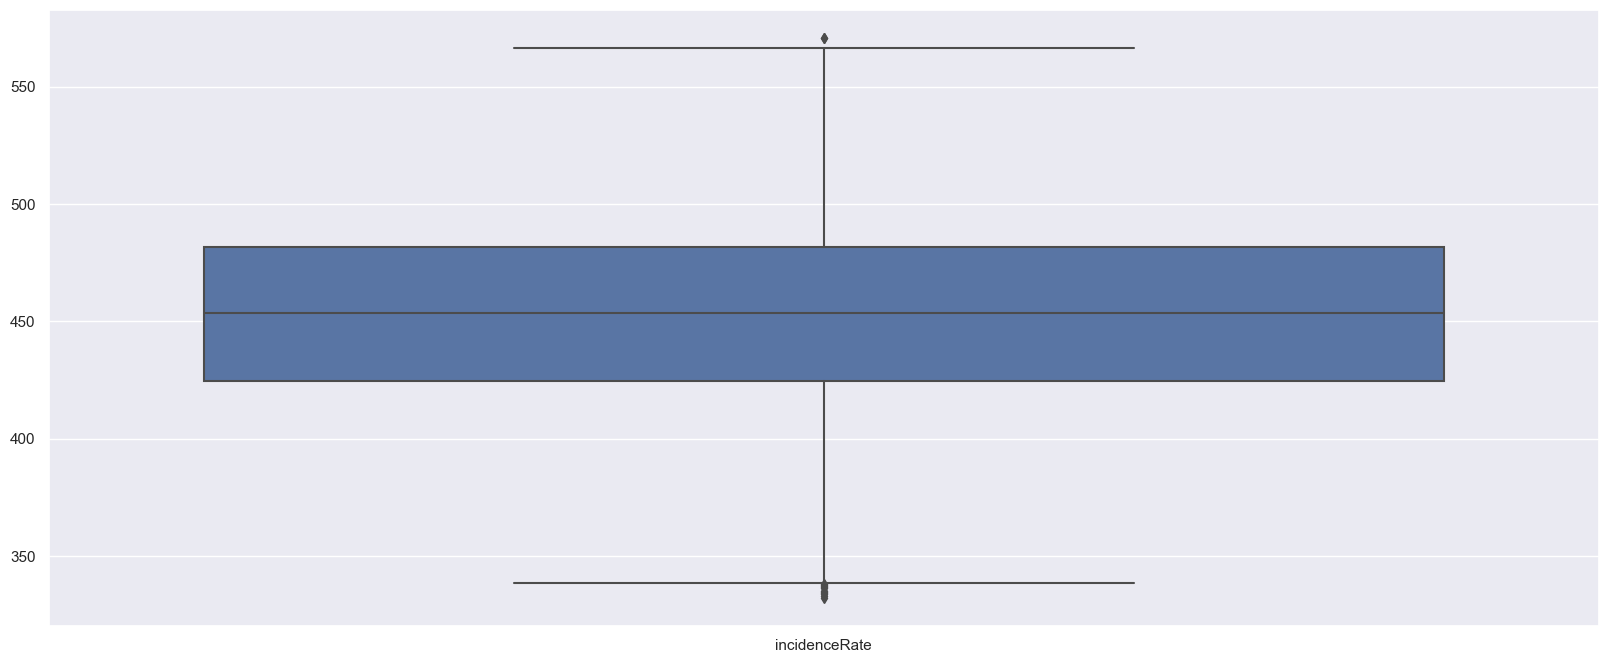

In [697]:
df_oms_prep_var2 = df_oms_prep[['incidenceRate']].copy()
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_oms_prep_var2, orient ="v")

In [698]:
# Calculate Q1, Q3, and IQR for 'deathRate'
Q1 = df_oms['MedianAge'].quantile(0.25)
Q3 = df_oms['MedianAge'].quantile(0.75)
IQR = Q3 - Q1

# Define the range within which values are not considered outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_oms_prep = df_oms[(df_oms['MedianAge'] >= lower_bound) & (df_oms['MedianAge'] <= upper_bound)]

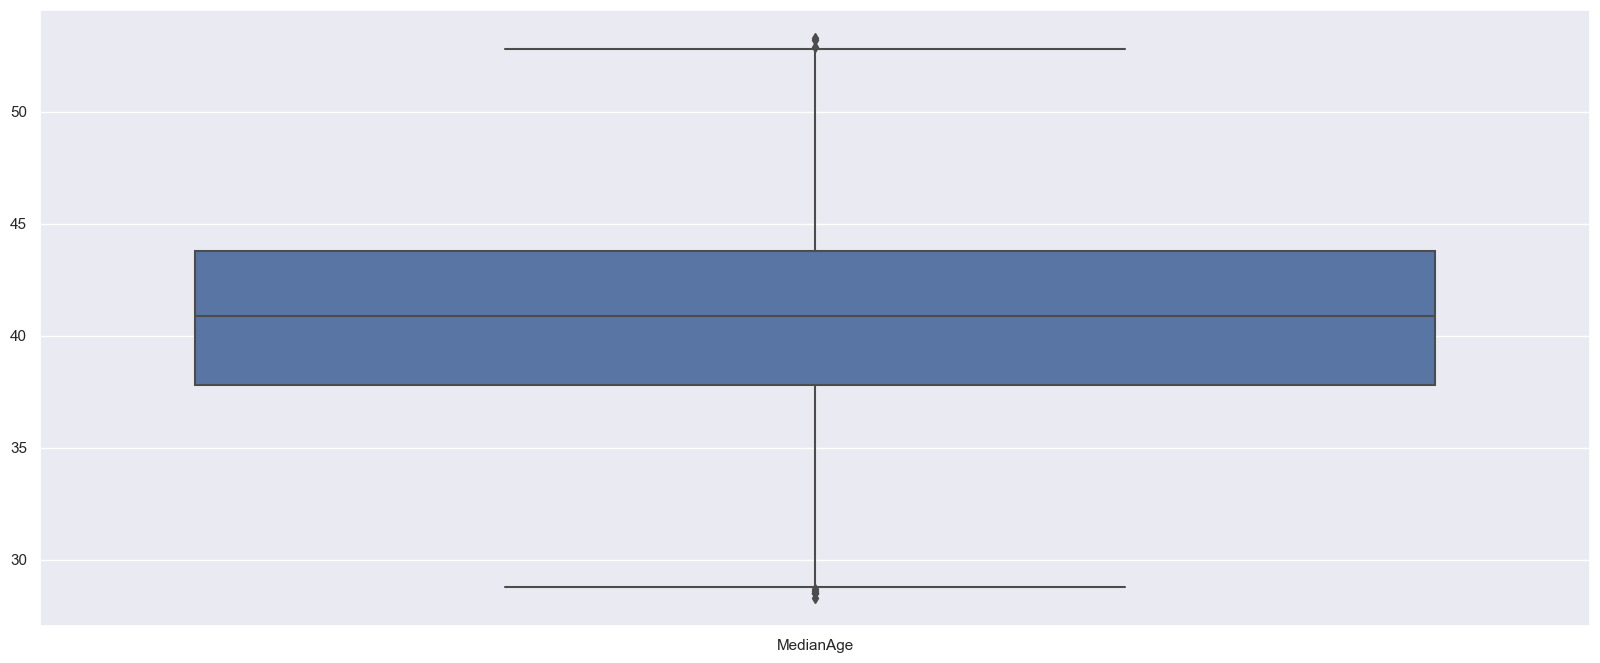

In [699]:
df_oms_prep_var4 = df_oms_prep[['MedianAge']].copy()
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_oms_prep_var4, orient ="v")

In [700]:
var_selec = ["avgAnnCount","medIncome","povertyPercent","PctHS25_Over","PctUnemployed16_Over","PctPublicCoverageAlone","avgDeathsPerYear","popEst2015","PctPublicCoverage","PctPrivateCoverage"]

# Function to remove outliers based on the IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to each column in var_selec
for column in var_selec:
    df_oms_prep = remove_outliers(df_oms, column)


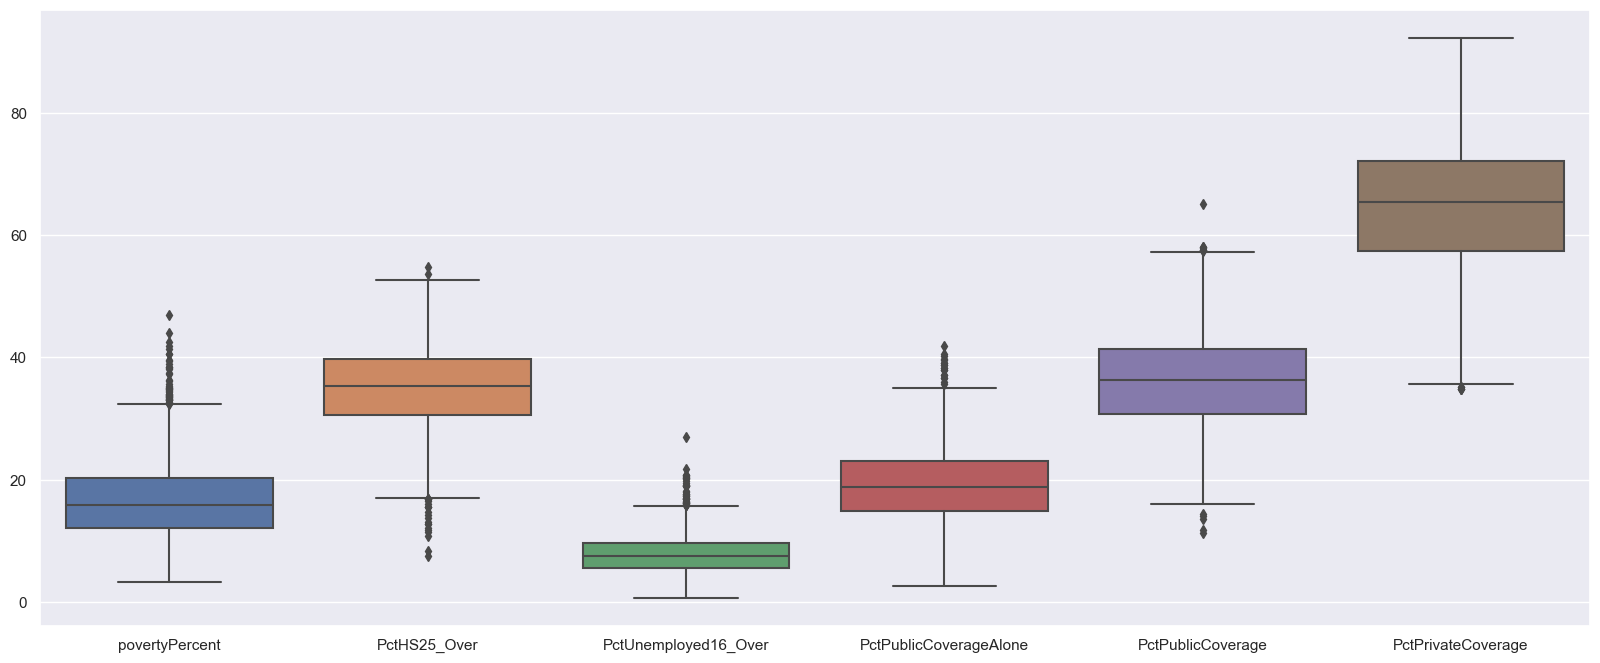

In [701]:
df_oms_prep_var5 = df_oms_prep[["povertyPercent","PctHS25_Over","PctUnemployed16_Over","PctPublicCoverageAlone","PctPublicCoverage","PctPrivateCoverage"]
].copy()
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_oms_prep_var5, orient ="v")

Considerando la sensibilidad de la regresión a la presencia de valores atípicos, se procedió a realizar una revisión exhaustiva de la mayoría de las columnas consideradas relevantes para nuestro estudio. Durante este proceso, se identificaron y eliminaron aquellos valores atípicos que podrían haber impactado la robustez y la precisión del modelo de regresión. La revisión y exclusión de outliers se llevaron a cabo con el objetivo de mejorar la integridad de los resultados y garantizar una representación más precisa de la relación entre las variables.

Los efectos de esta acción se pueden observar en las gráficas, donde se aprecia una distribución más homogénea y equilibrada de los datos. Esta medida contribuyó significativamente a mejorar la consistencia y la validez del modelo de regresión, al minimizar la influencia de valores extremos que podrían haber distorsionado la interpretación de las relaciones entre las variables de interés. La eliminación de outliers respalda la confiabilidad del análisis estadístico y fortalece la capacidad predictiva del modelo ajustado.

Ahora, se realizara un análisis para verificar la relación de las diferentes variables con la variable objetivo 

c:\Users\zeify\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


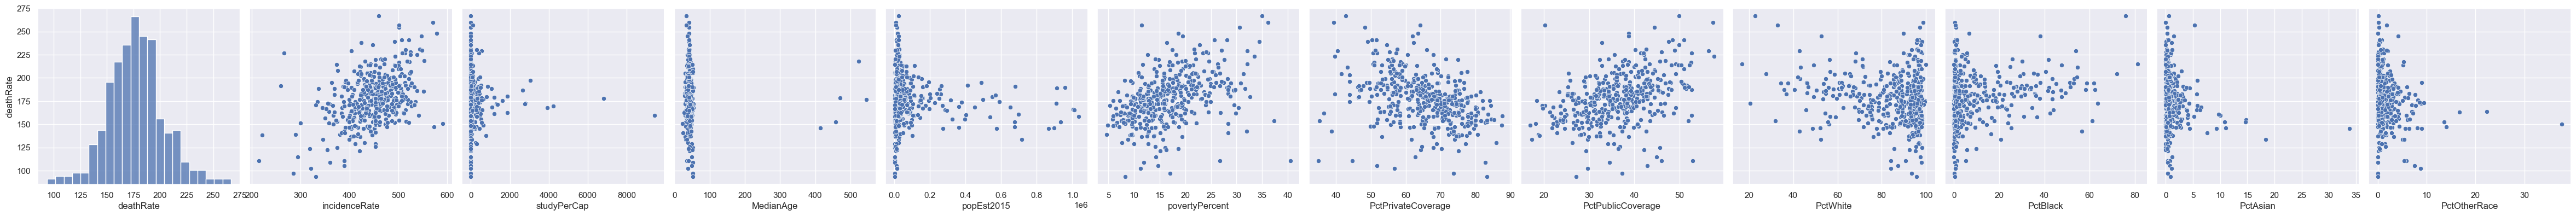

In [702]:
#Relación de la variable objetivo con las demas variables
sns.pairplot(df_oms_prep.sample(frac=0.2), height=4, y_vars="deathRate", x_vars=columnas, kind="scatter")

Revisamos preventivamente las correlaciones entre las variables explicativas para ayudar al proceso de selección.

C:\Users\zeify\AppData\Local\Temp\ipykernel_2264\806085194.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_oms_prep.corr(), cmap="Blues", vmin=0, vmax=1)


<Axes: >

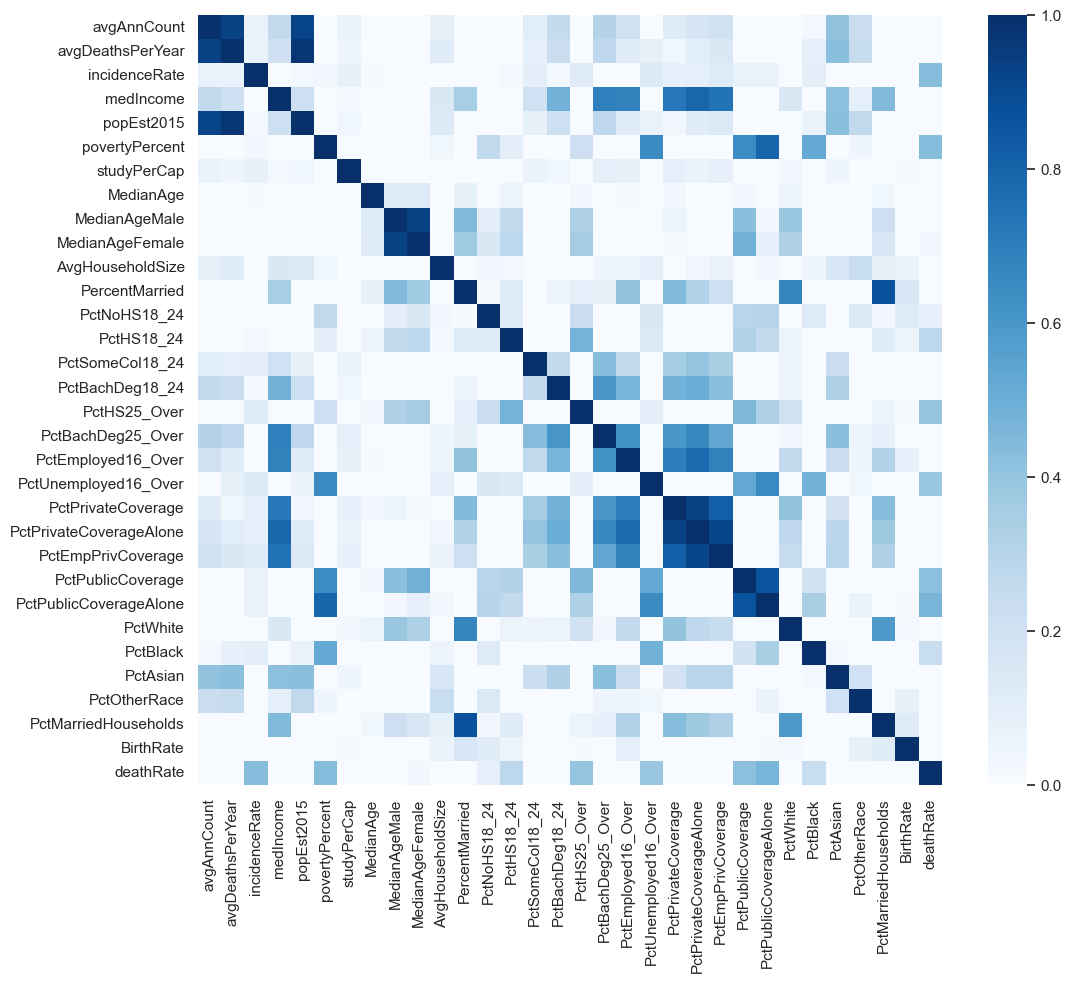

In [703]:
# Correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(df_oms_prep.corr(), cmap="Blues", vmin=0, vmax=1)

<Axes: >

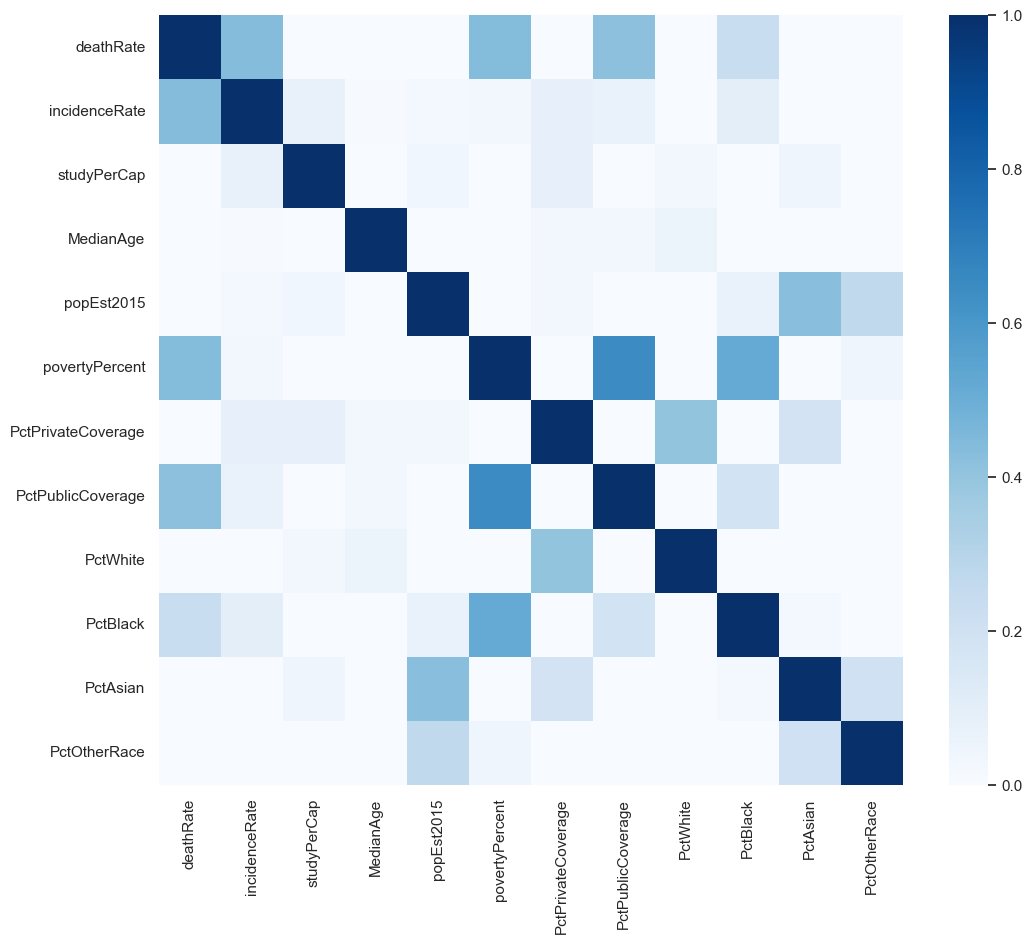

In [704]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_oms_prep[columnas].corr(), cmap="Blues", vmin=0, vmax=1)

Al analizar variables de importancia, como la tasa de mortalidad (death rate), observamos una correlación significativa con factores tales como el número promedio de diagnósticos de cáncer, el nivel de pobreza, la dependencia de servicios de salud proporcionados por el gobierno y la pertenencia a una raza específica, como ser de color. Esta primera evaluación nos permite vislumbrar posibles causas detrás de estas tasas de mortalidad, sugiriendo que la falta de recursos adecuados podría estar contribuyendo a la falta de tratamiento y, consecuentemente, a un aumento en las muertes.

En esta fase inicial, es plausible inferir que se requiere un respaldo particular para aquellas poblaciones con recursos limitados que no pueden costear los tratamientos necesarios, siendo estas mayormente comunidades de color. Esto resalta la importancia de dirigir esfuerzos y recursos hacia el apoyo de estas poblaciones desfavorecidas, abordando las barreras financieras para el tratamiento del cáncer y trabajando hacia soluciones que reduzcan las disparidades en la salud.

## 7. Entrenamiento del modelo

Dadas las correlaciones previamente identificadas, se han seleccionado las siguientes variables para nuestro análisis:

var_selec = ["incidenceRate","avgAnnCount","medIncome","povertyPercent","MedianAge","PctHS25_Over","PctUnemployed16_Over","PctPublicCoverageAlone","avgDeathsPerYear","popEst2015","PctPublicCoverage","PctPrivateCoverage"]

Estas variables han sido cuidadosamente elegidas debido a su capacidad para describir de manera precisa las características de la población en estudio. Este conjunto abarca aspectos clave como la tasa de incidencia del cáncer, el ingreso medio, el porcentaje de población en situación de pobreza, la edad media, la proporción de personas con educación secundaria o superior, el porcentaje de desempleo, la cobertura de salud pública y privada, entre otros.

La selección de estas variables permite una exploración más profunda, sugiriendo que el problema de las muertes por cáncer podría estar vinculado a poblaciones más vulnerables. Estas poblaciones, caracterizadas por ingresos medianos bajos, altos niveles de pobreza y limitados recursos para su salud, podrían depender en mayor medida de la cobertura estatal, la cual podría no ser suficiente.

Adicionalmente, la inclusión de variables como la edad y la educación ofrece una perspectiva más completa, revelando posibles ciclos, ya que la falta de educación podría asociarse a la ausencia de empleo y, consecuentemente, a un mayor riesgo de enfrentar problemas de salud, creando un ciclo difícil de romper.

En conjunto, estas variables seleccionadas proporcionan un marco detallado para analizar las dinámicas que rodean las muertes por cáncer, ofreciendo una visión integral de las condiciones socioeconómicas y de salud en las poblaciones consideradas.

In [705]:
#Se estandarizan las variables (aunque este proceso no afecta la regresion lineal, se realiza para tener todas las variables en la misma escala)
mms= StandardScaler()
var_selec = ["incidenceRate","povertyPercent","PctHS25_Over","PctUnemployed16_Over","PctPublicCoverageAlone","PctHS18_24"]
# Se selecciona la variable objetivo, en este caso "deathrate".
Y=df_oms_prep['deathRate']
# Del conjunto de datos se elimina la variable "deathrate"
#X = df_oms_prep[columnas].drop(['deathRate','studyPerCap','popEst2015','MedianAge'], axis=1)
pd_standard = mms.fit_transform(df_oms_prep[var_selec])
X = pd.DataFrame(pd_standard, columns =var_selec)

In [706]:
# Mostramos nuestros datos
X.head()

,incidenceRate,povertyPercent,PctHS25_Over,PctUnemployed16_Over,PctPublicCoverageAlone,PctHS18_24
0,1.368324,0.244905,0.514540,-1.722138,0.140013,-0.164146
1,-0.686808,-0.809716,1.605348,-0.688858,-0.227917,0.679407
2,0.446150,-1.496818,-0.703764,-1.813310,-2.251535,1.034587
3,1.468070,2.034564,0.812033,1.043405,1.444494,2.100126
4,-0.052577,1.091797,0.273713,1.195358,0.240358,1.334270


In [707]:
Y.head()

0    169.4
1    131.8
2    209.3
3    250.0
4    152.5
Name: deathRate, dtype: float64

Como vimos anteriormente todo parece seguir con lo esperado, pues la visualizacion nos muestra que las columnas que queremos han sido seleccionadas y estandarizadas por lo que podemos seguir con el modelo


In [708]:
# Se realiza la división entrenamiento - test. Se deja 30% de los datos para el test.

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=0)

In [709]:
X_train.shape, Y_train.shape

((1481, 6), (1481,))

In [710]:
X_test.shape, Y_test.shape

((635, 6), (635,))

### 7.2 Entrenamiento del modelo


En esta etapa, nos embarcamos en el entrenamiento del modelo utilizando la técnica de regresión lineal. Para llevar a cabo este proceso, aplicamos la herramienta de regresión lineal y ajustamos nuestro modelo previamente definido. Este paso es esencial para aprender y capturar las relaciones entre las variables seleccionadas, permitiendo al modelo hacer predicciones sobre la variable de interés en función de las características específicas de la población. El entrenamiento del modelo constituye un paso crucial para la aplicación efectiva de nuestro enfoque analítico, con el objetivo de comprender y prever las tendencias relacionadas con las muertes por cáncer en las poblaciones estudiadas.

In [711]:
# Primero se crea el objeto para construir el modelo
modelo_regresion = LinearRegression()
# Podemos verificar que lo hemos construido.
modelo_regresion

LinearRegression()

In [712]:
# Ajustar el modelo con los datos de entrenamiento
modelo_regresion.fit(X,Y)

LinearRegression()

In [713]:
pd.DataFrame({"columns": var_selec, "coef": modelo_regresion.coef_})


,columns,coef
0,incidenceRate,10.481792
1,povertyPercent,6.324086
2,PctHS25_Over,5.634290
3,PctUnemployed16_Over,2.026049
4,PctPublicCoverageAlone,3.069178
5,PctHS18_24,2.998499



Tras realizar un análisis exhaustivo de los coeficientes en nuestro modelo, nos dimos cuenta de que varias variables, inicialmente consideradas relevantes, presentaban coeficientes negativos con respecto a la variable de interés, la tasa de mortalidad (death rate). Esta observación suscitó una incongruencia con nuestras expectativas iniciales, ya que indicaba una relación inversa que no concordaba con el sentido lógico de las variables.

Ante esta discrepancia, optamos por realizar ajustes y eliminar las variables que generaban esta discordancia. Después de llevar a cabo este proceso, los resultados revelaron que los coeficientes restantes para las variables presentaban valores positivos. Este cambio sugiere que todas las variables incorporadas al modelo ahora mantienen una relación positiva con la tasa de mortalidad. Esta modificación no solo alinea la interpretación con nuestras expectativas, sino que también brinda una visión más consistente y coherente de cómo estas variables se relacionan con la tasa de mortalidad.

El refinamiento del modelo y la obtención de coeficientes positivos no solo mejoran la interpretación de la relación entre las variables y la tasa de mortalidad, sino que también fortalecen la validez y la confiabilidad de nuestras conclusiones. Este proceso de ajuste demuestra la importancia de una revisión minuciosa de los resultados y la adaptabilidad en la construcción de modelos para asegurar interpretaciones sólidas y fundamentadas.

In [714]:
modelo_regresion.intercept_

178.9858223062382

Por otro lado, cabe destacar que el intercepto de nuestro modelo de regresión se establece en 
178.98
 Este valor representa el punto en el eje vertical (eje Y) donde la línea de regresión corta dicho eje, es decir, la estimación predicha de nuestra variable de interés cuando todas las variables predictoras son igual a cero. El intercepto proporciona un punto de referencia fundamental para entender el inicio de la relación entre las variables, aportando así un contexto valioso para la interpretación de los resultados del modelo. En este caso, el intercepto de 
178.98 constituye un componente esencial de nuestra ecuación de regresión, ofreciendo información sobre el valor inicial predicho de la tasa de mortalidad antes de considerar el impacto de las variables predictoras.

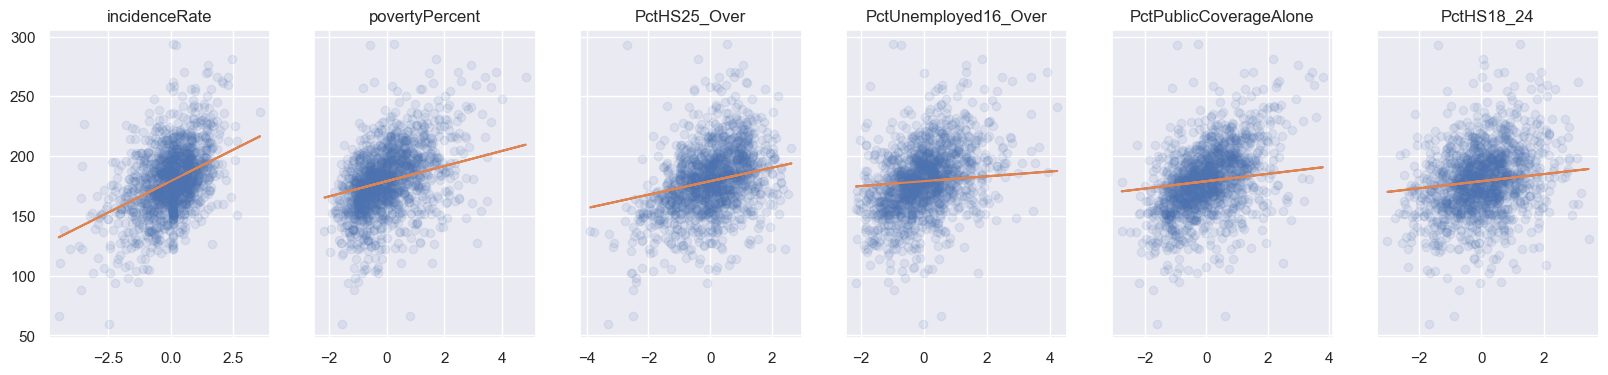

In [715]:
f, axs = plt.subplots(1, len(var_selec), sharey=True, figsize=(20, 4))

for i in range(len(var_selec)):
    col = var_selec[i]
    x = X_train[col]
    m = modelo_regresion.coef_[i]
    b = modelo_regresion.intercept_

    axs[i].plot(x, Y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

Desde una perspectiva cualitativa, podemos afirmar que el modelo calculado exhibe el comportamiento esperado de acuerdo con las variables seleccionadas. Proporciona una valiosa intuición sobre cómo se relacionan las muertes por cáncer con estas variables específicas. Esta evaluación cualitativa implica que el modelo captura de manera efectiva las tendencias y patrones previamente identificados durante el análisis exploratorio, ofreciendo una representación coherente y comprensible de la relación entre las variables predictoras y la variable de interés, la tasa de mortalidad por cáncer.

Para validar cuantitativamente la eficacia del modelo, procederemos a utilizar el conjunto de datos de prueba que fue reservado anteriormente. Este conjunto de datos independiente proporcionará una medida objetiva de la capacidad predictiva del modelo en un contexto fuera de la fase de entrenamiento. Al evaluar el rendimiento del modelo en datos no vistos, podremos verificar su capacidad para generalizar patrones y predecir la tasa de mortalidad por cáncer de manera efectiva en nuevas observaciones. Esta validación adicional fortalecerá la confianza en la utilidad y la precisión del modelo en el análisis de muertes por cáncer en poblaciones específicas.

## 8. Validación del modelo

Para la validación del modelo se utilizaran distintas medidas de error.

**Mean Absolute Error (MAE)**

$$ MAE = {1 \over n}{\sum_{i=1}^n {|y_{i} - y_{i}'|} } $$

In [718]:
y_pred = modelo_regresion.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))



MSE: 19.89
MAE: 14.41
R²: 0.42


**Root Mean Squeared Error (RMSE)**

$$ RMSE = {1 \over n}{\sum_{i=1}^n {(y_{i} - y_{i}')^2} } $$

In [721]:
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))


MSE: 19.89


**Coeficiente de determinacion (R²)**



$$ R²

In [722]:
print('R²: %.2f' % r2_score(Y_test, y_pred))


R²: 0.42
